<a href="https://colab.research.google.com/github/partizanos/multimedia_security/blob/master/multimedia_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 Multimedia security Dimitris Proios

1. Read in the image ’peacock.jpg’. The image is present in Matlab.

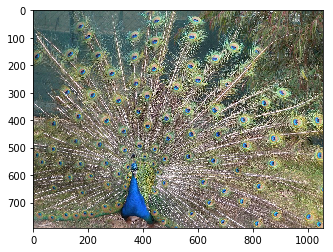

In [0]:
import matplotlib.image as mpimg; import matplotlib.pyplot as plt; import numpy as np; import requests; from PIL import Image; from io import BytesIO; import math; from skimage import data
# https://github.com/partizanos/multimedia_security/blob/master/TP/TP1/peacock.jpg
# url = "https://github.com/partizanos/multimedia_security/raw/master/multimedia_5/cameraman.tif"
url = "https://github.com/partizanos/multimedia_security/raw/master/TP/TP1/peacock.jpg"
response = requests.get(url)
im = Image.open(BytesIO(response.content))
X  = np.array(im)
X
plt.imshow(X)
# N1, N2 = X.shape
# N = int(N1*N2)

2. Display the size and the histogram of the image.


In [0]:
X.shape, 

((792, 1056, 3),)

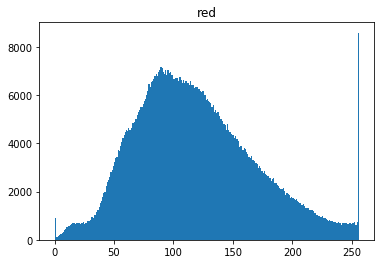

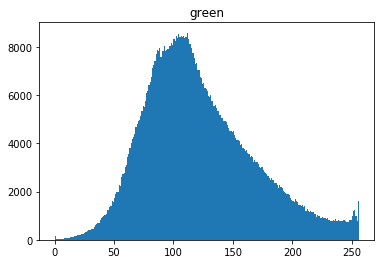

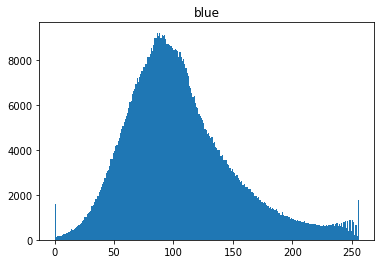

In [0]:
import PIL
import requests
from io import BytesIO;
from PIL import Image
from matplotlib import pyplot as plt
url = "https://github.com/partizanos/multimedia_security/raw/master/TP/TP1/peacock.jpg"
response = requests.get(url)
im = Image.open(BytesIO(response.content))


img = np.array(im)
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]
plt.hist(r.ravel(),256,[0,256]); plt.title("red"); plt.show()
plt.hist(g.ravel(),256,[0,256]); plt.title("green"); plt.show()
plt.hist(b.ravel(),256,[0,256]); plt.title("blue"); plt.show()

3. Convert the image to grayscale.

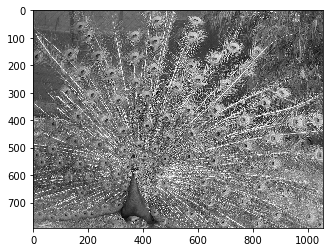

In [0]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray
  
plt.imshow(rgb2gray(np.array(im)), cmap="gray")

4. Determine the global mean and the global variance of the image.

In [0]:
np.mean(np.array(im)), np.var(np.array(im))

(115.08386181894704, 2336.02723346917)

5. Determine the local mean and variance of an image and display them. See Matlab blockproc and
colfilt. Use distinct non-overlapping blocks.

In [0]:
im_gray = rgb2gray(np.array(im))
np.mean(np.array(im_gray)), np.var(np.array(im_gray).flatten()), im_gray.shape
np.max(np.array(im)),np.min(np.array(im))

(255, 0)

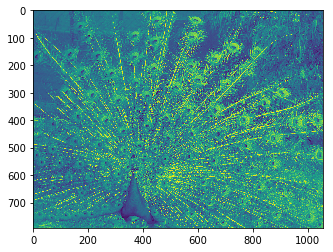

In [0]:
plt.imshow(im_gray)

Here we split our image to blocks with the help of reshape function of numpy


In [0]:
from numpy.lib.stride_tricks import as_strided as ast

X = np.array(im)

def img_2_block(ch1, ch2, ch3,max_M, max_N ):
  number_octads = int(max_M* max_N / 64)
  ch1 = ch1.reshape((number_octads, 8,8))
  ch2 = ch2.reshape((number_octads, 8,8))
  ch3 = ch3.reshape((number_octads, 8,8))
  return ch1, ch2,ch3


R = X[:,:,0]
G = X[:,:,1]
B = X[:,:,2]
R_r, G_r,B_r = img_2_block(R, G, B, X.shape[0], X.shape[1])
R.shape,R_r.shape

R[:9,:16]

array([[78, 73, 69, 71, 76, 80, 79, 75, 76, 79, 80, 77, 75, 76, 77, 76],
       [76, 73, 70, 71, 75, 77, 77, 75, 74, 76, 79, 81, 79, 75, 73, 73],
       [73, 72, 71, 71, 71, 72, 73, 73, 73, 72, 76, 83, 81, 71, 67, 70],
       [70, 71, 72, 71, 70, 70, 71, 73, 75, 71, 74, 81, 79, 68, 65, 72],
       [66, 68, 70, 70, 68, 68, 69, 70, 76, 71, 70, 73, 71, 65, 66, 74],
       [66, 67, 68, 69, 70, 71, 71, 70, 76, 74, 71, 67, 65, 67, 72, 77],
       [65, 64, 64, 68, 72, 74, 72, 69, 71, 76, 72, 62, 61, 70, 77, 75],
       [66, 63, 63, 67, 74, 77, 74, 69, 68, 77, 75, 61, 60, 74, 80, 74],
       [60, 61, 63, 66, 68, 71, 73, 75, 77, 69, 64, 64, 65, 68, 76, 85]],
      dtype=uint8)

Below we see the local mean and variance for the values of red channel of our image.

(77.265625, 17.132568359375)

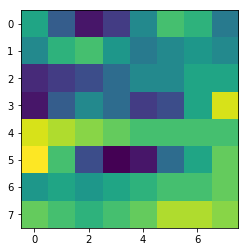

In [0]:
# The first block
plt.imshow(R_r[0])

np.mean(R_r[0]), np.var(R_r[0])

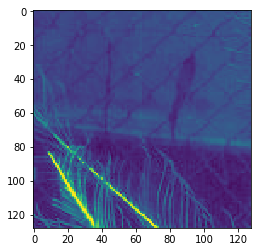

In [0]:
plt.imshow(R[:128,:128])

def img_2_block(ch1, ch2, ch3,max_M, max_N ):
  return

def channel_2_block(ch, block_size ):
  M, N = ch.shape
  for i in range(0, M, 8):
    for j in range(0, M, 8):
      ch[i:i+8][j:j+8]


## Additive White Gaussian Noise  Noise
This exercise will showcase two noise types, Additive White Gaussian Noise (AWGN) and salt & pepper noise.


Write a function that generates an array of size N × M with Gaussian Noise, i.e. samples drawn from the distribution N (μ, σ). See the Matlab function randn.

In [0]:
m, n, _ = X.shape
mean, var=0, 1
WGN = [np.random.normal(mean,var) for r  in range(m*n)]
WGN = np.array(WGN)
WGN = WGN.reshape((m, n ))
WGN

array([[-0.54713776, -0.56785324, -0.05641007, ...,  0.17044348,
         0.19139881,  0.98175714],
       [-2.29599783, -1.64985811, -0.7541222 , ...,  0.66862371,
         0.43714822,  0.40312034],
       [ 0.64354837, -0.96968323,  0.89139244, ..., -0.23603034,
         0.2215197 ,  1.25048946],
       ...,
       [ 1.30049253,  0.34547718, -1.18789947, ..., -1.40369484,
         0.43812077, -1.73865947],
       [-0.7102818 ,  0.32618226,  0.59973235, ...,  0.19831528,
        -0.87484011, -0.90641933],
       [ 0.84005204,  1.12128668, -0.98370769, ..., -0.011918  ,
         0.81563207,  0.89417422]])

## Salt & pepper Noise
Implement a function that generates salt & pepper noise with parameters p and q.

In [0]:
def salt_pepper(p,q, val ):
  r = np.random.random()
  if r<p:
    return 255 
  if r< p+q:
    return 0
  else:
    return val
  
p =0.1
q =0.2 
val = 131
salt_pepper(p,q, val )

131

## Mean Squared Error
### 1. Write a function that determines the Mean Squared Error (MSE) between two images x and y.

In [0]:
def mse(imageA, imageB) -> float:
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

### 2. Read in a new copy of the image peacock.jpg, keep it in its original datatype and range, i.e. uint8 and {0..255}.

In [0]:
X_new  = np.array(im)
X_new[:5,:5,0]

array([[78, 73, 69, 71, 76],
       [76, 73, 70, 71, 75],
       [73, 72, 71, 71, 71],
       [70, 71, 72, 71, 70],
       [66, 68, 70, 70, 68]], dtype=uint8)

### 3. Now read in a second copy of the image peacock.jpg but map it to double and {0..1}. See Matlab im2double. Compare the two images using the MSE. Can you explain the result?

**Answer**
Although it is the same image we error becuse MSE doesnt take into account the domain transport we did



In [0]:
X_mapped=X_new.astype(np.float32)
X_mapped /= 255
X_mapped[:5,:5,0]
assert mse(X_new,X_new ) == 0.0 
mse(X_new,X_mapped )


46375.09043751896

## Peak Signal to Noise Ratio 
Write a function that implements the PSNR function.

In [0]:
PSNR = lambda x,y,a=255:10*np.log10(a**2/mse(x,y))
PSNR(X_new,X_mapped )

1.467955913126864

1. Refractor the PNSR definition such that the PSNR is expressed as a function of the noise variance
$σ_z^2$ . You may assume that $σ_z^2 = M SE(x, y)$.

**Answer**

$ PSNR  = 10 log_{10}(\frac{a^2}{\sigma^2})$ => 

$ \frac{PSNR}{10}  =log_{10}(\frac{a^2}{\sigma^2}) $ =>

$ 10 ^{\frac{PSNR}{10}}  = \frac{a^2}{\sigma^2} $ =>

$ 10 ^{\frac{PSNR}{10}}  = \frac{a^2}{\sigma^2} $ =>


$\frac{a^2}{ 10 ^{\frac{PSNR}{10}}}  = \sigma^2 $ 

In [0]:
sigma_PSNR = lambda psnr,a=255: a**2/(10**(psnr/10))

2. Add Gaussian noise to an image such that the PSNR ratio with the original image is 10dB, 20dB,
30dB and 40dB. Use randn, not imnoise.

In [0]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

sigmas = [sigma_PSNR(10),sigma_PSNR(20),sigma_PSNR(30),sigma_PSNR(40)]

m, n, _ = X_new.shape
mean = 0 
X_gray = rgb2gray(X_new)

WGNS = []
for var in sigmas:
  WGN = [np.random.normal(mean,var) for r  in range(m*n) ]
  WGN = np.array(WGN).reshape((m, n ))  
  X_noised = WGN + X_gray
  WGNS.append(X_noised)

3. Show the noisy images on the screen. How do they look?

** Answer **
We observe that the more noise the more clear the image which makes sense sinse MSE is in the denominator if the fraction in the formula.

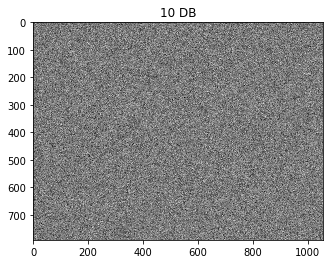

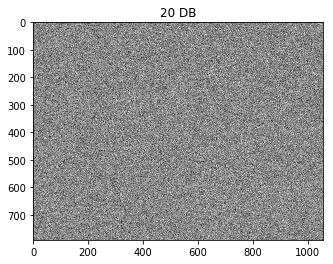

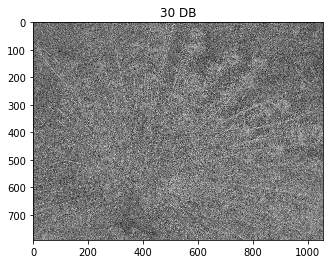

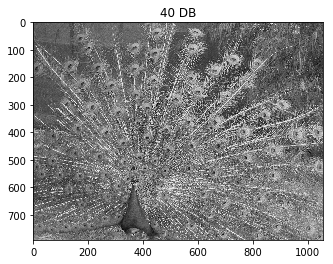

In [0]:
for i, im in enumerate(WGNS):
  plt.imshow(im, cmap="gray"); plt.title(str(i*10+10)+" DB"); plt.show()

4. Show the histograms for these noisy images, can you explain what you see?

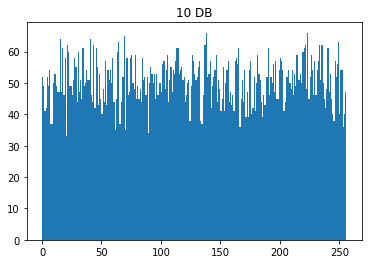

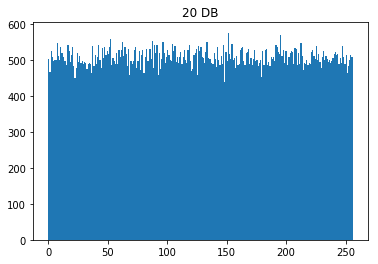

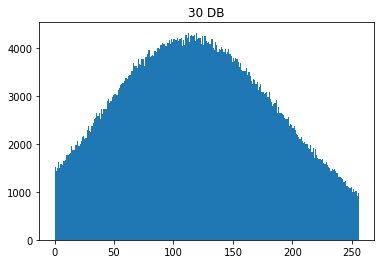

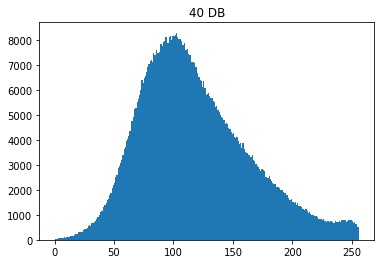

In [0]:
for i, im in enumerate(WGNS):
  plt.hist(im.ravel(),256,[0,256]); plt.title(str(i*10+10)+" DB"); plt.show()

5. Add salt & pepper Noise to an image until the PSNR ratio between the original and the noisy
image is 40 dB. Visually compare it to the 40dB noisy image to which Gaussian noise was added.
What can you conclude?

In [0]:
import copy 

def mse(imageA, imageB) -> float:
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err


def gaussianNoise(image, var, mean = 0):
      row,col = image.shape
      sigma = var**0.5
      randomGaus = np.random.normal(mean,sigma,(row,col))
      gaussNoiseMatrix = randomGaus.reshape(row,col)
      noisy = image + gaussNoiseMatrix
      return noisy, gaussNoiseMatrix

def psnr(mseres):
    PIXEL_MAX_SQUARE = 1
    mse_square = math.sqrt(mseres )
    part1 =  math.log10(PIXEL_MAX_SQUARE / mse_square)
    return 20 * part1

imgCam = cv2.imread('./data/cameraman.tif', -1)
imgCam_double = np.array(imgCam).astype("float32")
imgCam_double = np.interp(
    imgCam_double, 
    (imgCam_double.min(), imgCam_double.max()), 
    (0, 1)
)

def get_img_with_pepper_salt_noise(img, p, q):
    im = copy.deepcopy(img)
    randnums = np.random.rand(256,256)
    im[np.logical_and(randnums > p, randnums < q)] = 1
    im[ randnums <= p] = 0
    return im 

pepperedImg = get_img_with_pepper_salt_noise(imgCam_double, p=0.00015, q=0.0003)
mseNum  = mse(imgCam_double,pepperedImg)
print("mse: ", mseNum)
print("psnr: ", psnr(mseNum))
showTifGrayScale(noised_images[3][1], "gaussian image")
showTifGrayScale(pepperedImg, "Peppered image 40 DB psnr")
showTifGrayScale(imgCam_double, "Original image")

### 2.e.2) Visually compare it to the 40dB noisy image to which Gaussian noise was added. What can you conclude?
pepperedImg = get_img_with_pepper_salt_noise(imgCam_double, p=0.15, q=0.3)
mseNum  = mse(imgCam_double,pepperedImg)
print("high noise image mse: ", mseNum)
print("high noise image psnr: ", psnr(mseNum))
showTifGrayScale(pepperedImg, "Peppered image")

## Identification
### Design and implementation of the perceptual hash function.

In [0]:
# Read in an image and convert it to grayscale.

url = "https://github.com/partizanos/multimedia_security/raw/master/multimedia_5/cameraman.tif"
response = requests.get(url)
im = Image.open(BytesIO(response.content))
X  = np.array(im)

# Determine the global mean of the image.

global_mean = np.mean(X)

# For each 32 × 32 subimage non-overlapping block, determine the local mean.

k = int(X.shape[0]/32)
l = int(X.shape[1]/32)

blocks = X.reshape((k,l, 32,32))
blocks.shape

local_means = []
for i, _ in enumerate(blocks):
  for j, el in enumerate(blocks):
    local_means.append(np.mean(blocks[i][j]))

#For each subimage block determine if the local mean is larger than the global mean. If so, the
#hash value for this particular block is 1 and 0 otherwise. The resulting descriptor is thus a 64 bit
#binary vector.

hash = [1 if local > global_mean else 0 for local in local_means ]
hash[10:25]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

### Testing the uniqueness of the generated descriptor vectors for a small collection of images.

### Testing the influence of noise on the image on its resulting descriptor vector.

## Perceptual Hash

The basic algorithm can be implemented as follows:

Exercise
1. Read in an image and convert it to grayscale.
2. Determine the global mean of the image.
3. For each 32 × 32 subimage non-overlapping block, determine the local mean.
4. For each subimage block determine if the local mean is larger than the global mean. If so, the
hash value for this particular block is 1 and 0 otherwise. The resulting descriptor is thus a 64 bit
binary vector.

## Hamming distance

### Exercise
1. Implement a function that determines the Hamming distance h and probability of error P b
between two binary vectors.


2. Implement a Matlab function that can read in 200 images sequentially and stores the 200
resulting binary descriptor vectors. See the Matlab dir function.

Process Process-2:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Process-4:
Process Process-3:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-5:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "<ipython-input-24-17995a23a51e>", line 12, in getImageProc
    result[index] = readImage(im)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "<ipython-input-24-17995a23a51e>", line 6, in readImage
    response = requests.get(ImageAbsolutePath)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.p

KeyError: ignored

## Inter and intra class distance
### 1. Implement a function that takes all images one by one, makes a copy and distorts this copy with AWGN resulting in a PSNR of 35dB.


###  2. Determine the descriptor of both the original image and the distorted copy. Do this for all 200 images


### 3. Implement a function that determines the probability of error P b between all pairs of two from different classes among the 200.


### 4. Build and show a normalized histogram of all found P b values. Normalized means that all values from all histogram buckets should sum up to 1. You are thus estimating a probability mass function (PMF) of the inter-class distances.


5. What can you conclude from the histogram.


6. Implement a function that determines the probability of error P b between all pairs of two from
the same class among the 200.


7. Build and show a normalized histogram of all found P b values. You are thus estimating a
probability mass function (PMF) of the intra-class distances.


8. What can you conclude from the histogram.


9. Compare the estimated probability density graphs from the intra-class and inter-class distances.
Do they overlap? What can you conclude from this?